In [37]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Upload the file (popup will appear)
uploaded = files.upload()

training_data = pd.read_csv("soccer_training.csv")

Saving soccer_training.csv to soccer_training (3).csv


In [58]:
training_data.describe()
training_data["Session_Load"]=training_data["Duration_min"]*training_data["sRPE"]
training_data["Date"]=pd.to_datetime(training_data["Date"])
training_data

training_data["Week"]=training_data["Date"].dt.isocalendar().week
weekly_load = training_data.groupby(["Player", "Week"])["Session_Load"].sum().reset_index()

Weekly Training Load:
      Player  Week  Session_Load
0    Player1    36          1822
1    Player1    37          1678
2   Player10    36          1027
3   Player10    37          1178
4   Player11    36          2640
5   Player11    37          1427
6   Player12    36           782
7   Player12    37          2246
8   Player13    36          1914
9   Player13    37           837
10  Player14    36          2639
11  Player14    37           744
12  Player15    36          1657
13  Player15    37          2457
14  Player16    36          1050
15  Player16    37          2698
16  Player17    36          1478
17  Player17    37          1853
18  Player18    36          2631
19  Player18    37           770
20  Player19    36          1412
21  Player19    37          1488
22   Player2    36          1264
23   Player2    37          2468
24  Player20    36          3115
25  Player20    37          2620
26   Player3    36          2204
27   Player3    37          1320
28   Player4    36   

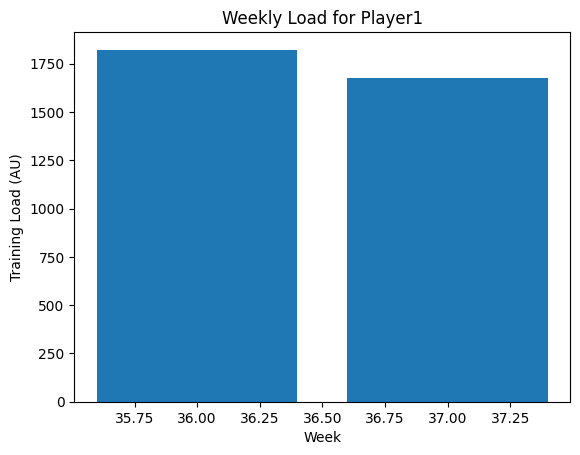

In [60]:
print("Weekly Training Load:")
print(weekly_load)


In [61]:
pivot = weekly_load.pivot(index="Player", columns="Week", values="Session_Load").fillna(0)
print(pivot.head())


Week        36    37
Player              
Player1   1822  1678
Player10  1027  1178
Player11  2640  1427
Player12   782  2246
Player13  1914   837


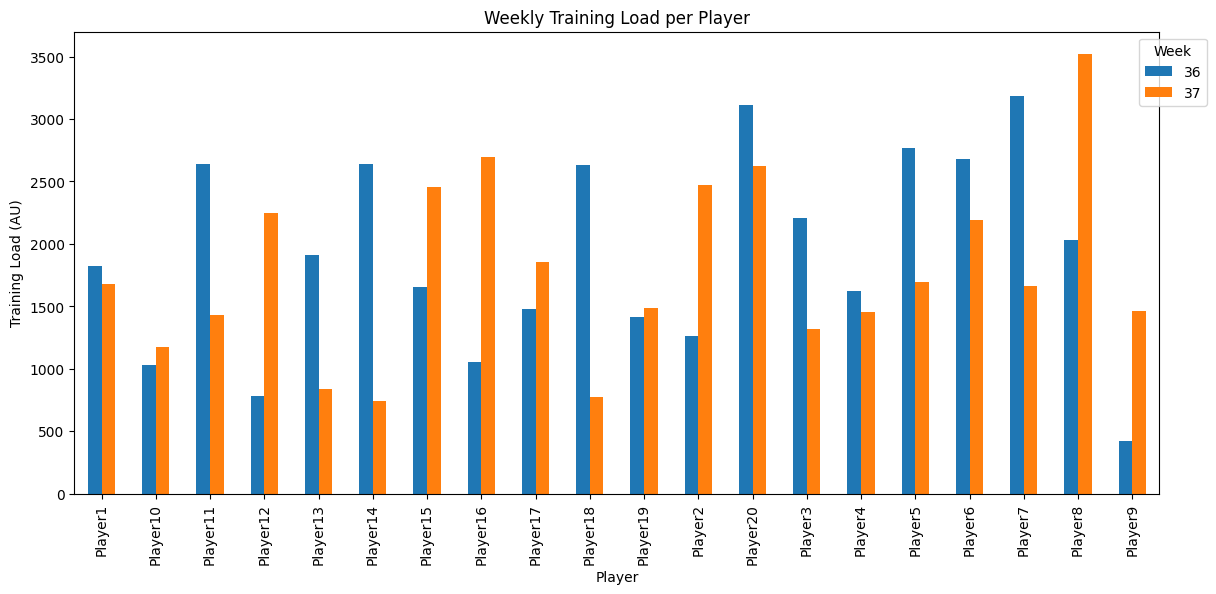

In [65]:
pivot.plot(kind="bar", figsize=(14,6))
plt.ylabel("Training Load (AU)")
plt.xlabel("Player")
plt.title("Weekly Training Load per Player")
plt.legend(title="Week", bbox_to_anchor=(1.05, 1))
plt.show()